In [117]:
# SETTING UP THE DATA

import numpy as np
from sklearn.model_selection import train_test_split
from Mycode.linearmodels import LinearRegression
from Mycode.nonlinearmodels import GradientDescentLinearRegression, SGD_plain, SGD_momentum, GD_momentum
from Mycode.ml_tools import normalize_data, normalize_target

# DATASET - MORE COMPLICATED
""" x, y = np.meshgrid(x, y)
x = np.ravel(x)
y = np.ravel(y)
z = frankeFunction(x, y) + noise # Observed data
deg = 5          # degree
X = designMatrix(x, y, deg, with_intercept=False) # Generate design matrix
print(f"Design matrix shape: {X.shape}") """

# DATASET - SIMPLER
np.random.seed(50) # a seed to use the same random variables
n = 100 # datapoints
x = np.linspace(-3, 3, n)
print(x.shape)
y = x**2 + 1.5*x - 9 + np.random.normal(0, 0.1)
# Design matrix
'''X = np.zeros((len(x), degree))
for p in range(degree):
    X[:, p] = x ** (p)'''
X = np.c_[np.ones((n,1)), x]
print(X.shape)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the data, i.e, subtract the mean and divide by std (based on the training set)
X_train_scaled, X_test_scaled = X_train, X_test #normalize_data(X_train, X_test, with_intercept=False)
y_train_scaled, y_test_scaled = y_train, y_test #normalize_target(y_train, y_test)

(100,)
(100, 2)


In [118]:
''' Regular Linear Regression using Matrix Inversion
------------------------------------------
fit_intercept = True, includes the intercept'''
np.random.seed(50)
# Create linear regression object
ols_linreg = LinearRegression(fit_intercept=True)
# Train the model using the (scaled) training sets
fit_inversion = ols_linreg.fit(X_train_scaled, y_train_scaled)
predict_inversion = ols_linreg.predict(X_test_scaled)

In [119]:
'''Setting up the Gradient Descent Linear Regression object'''

np.random.seed(50)
# Create Gradient Descent Object
OLS_GD = GradientDescentLinearRegression(0.01, 1000)
fit_GD = OLS_GD.fit(X_train_scaled, y_train_scaled)
predict_GD = OLS_GD.predict(X_test_scaled)

In [120]:
'''Setting up the GD Linear Regression object, now WITH MOMENTUM'''

np.random.seed(50)
# Create Gradient Descent Object
OLS_GDM = GD_momentum(0.01, 1000, 0.4)
fit_GDM = OLS_GDM.fit(X_train_scaled, y_train_scaled)
predict_GDM = OLS_GDM.predict(X_test_scaled)

In [121]:
'''Setting up the Stochastic GD Linear Regression object'''
np.random.seed(50)
# Create Stochastic Gradient Descent Object with momentum
OLS_SGD = SGD_plain(0.01, 1000, 10, 5) #learning rate, iterations, number of epochs, batch size
fit_SGD = OLS_SGD.fit(X_train_scaled, y_train_scaled)
predict_SGD = OLS_SGD.predict(X_test_scaled)

In [122]:
'''Setting up the Stochastic GD Linear Regression object, now WITH MOMENTUM'''
np.random.seed(50)
# Create Gradient Descent Object
OLS_SGDM = SGD_momentum(0.01, 1000, 10, 5, 0.3)  #learning rate, iterations, number of epochs, batch size, momentum
fit_SGDM = OLS_SGDM.fit(X_train_scaled, y_train_scaled)
predict_SGDM = OLS_SGDM.predict(X_test_scaled)

In [116]:
# EXERCISE 1 - PRINTING RESULTS

#Matrix Inversion
beta = ols_linreg.coef_
print('RESULTS FOR OLS Regular Matrix Inversion:\n ')
print('Coefficients: ',beta)
# MSE and R2 using Linear Regression
mse_train = ols_linreg.mse(X_train_scaled, y_train_scaled)
mse_test = ols_linreg.mse(X_test_scaled, y_test_scaled)
r2_train = ols_linreg.r2(X_train_scaled, y_train_scaled)
r2_test = ols_linreg.r2(X_test_scaled, y_test_scaled)
print(f"Train MSE M-Inv: {mse_train}",f"Test MSE M-Inv: {mse_test}")
print(f"Train R2 M-Inv: {r2_train}",f"Test R2 M-Inv: {r2_test}\n")

#Gradient Descent
betaGD = OLS_GD.theta
print('RESULTS FOR OLS Gradient Descent:\n ')
print('Coefficients: ',betaGD)
# MSE and R2 using Gradient Descent
GDmse_train = OLS_GD.mse(X_train_scaled, y_train_scaled)
GDmse_test = OLS_GD.mse(X_test_scaled, y_test_scaled)
GDr2_train = OLS_GD.r2(X_train_scaled, y_train_scaled)
GDr2_test = OLS_GD.r2(X_test_scaled, y_test_scaled)
print(f"Train MSE G.D: {GDmse_train}",f"Test MSE G.D: {GDmse_test}")
print(f"Train R2 G.D: {GDr2_train}",f"Test R2 G.D: {GDr2_test} \n")

#Gradient Descent with momentum
betaGDM = OLS_GDM.theta
print('RESULTS FOR OLS Gradient Descent with Momentum:\n ')
print('Coefficients: ',betaGDM)
# MSE and R2 using Gradient Descent
GDMmse_train = OLS_GDM.mse(X_train_scaled, y_train_scaled)
GDMmse_test = OLS_GDM.mse(X_test_scaled, y_test_scaled)
GDMr2_train = OLS_GDM.r2(X_train_scaled, y_train_scaled)
GDMr2_test = OLS_GDM.r2(X_test_scaled, y_test_scaled)
print(f"Train MSE: {GDMmse_train}",f"Test MSE: {GDMmse_test}")
print(f"Train R2: {GDMr2_train}",f"Test R2: {GDMr2_test}\n")

# Stochastic Gradient Descent - PLAIN
betaSGD = OLS_SGD.theta
print('RESULTS FOR OLS Stochastic Gradient Descent:\n ')
print('Coefficients: ',betaGD)
# MSE and R2 using Gradient Descent
SGDmse_train = OLS_SGD.mse(X_train_scaled, y_train_scaled)
SGDmse_test = OLS_SGD.mse(X_test_scaled, y_test_scaled)
SGDr2_train = OLS_SGD.r2(X_train_scaled, y_train_scaled)
SGDr2_test = OLS_SGD.r2(X_test_scaled, y_test_scaled)
print(f"Train MSE G.D: {SGDmse_train}",f"Test MSE G.D: {SGDmse_test}")
print(f"Train R2 G.D: {SGDr2_train}",f"Test R2 G.D: {SGDr2_test} \n")

# Stochastic Gradient Descent - WITH MOMENTUM
betaSGDM = OLS_SGDM.theta
print('RESULTS FOR OLS Stochastic Gradient Descent WITH momentum:\n ')
print('Coefficients: ',betaGD)
# MSE and R2 using Gradient Descent
SGDMmse_train = OLS_SGDM.mse(X_train_scaled, y_train_scaled)
SGDMmse_test = OLS_SGDM.mse(X_test_scaled, y_test_scaled)
SGDMr2_train = OLS_SGDM.r2(X_train_scaled, y_train_scaled)
SGDMr2_test = OLS_SGDM.r2(X_test_scaled, y_test_scaled)
print(f"Train MSE G.D: {SGDMmse_train}",f"Test MSE G.D: {SGDMmse_test}")
print(f"Train R2 G.D: {SGDMr2_train}",f"Test R2 G.D: {SGDMr2_test} \n")


RESULTS FOR OLS Regular Matrix Inversion:
 
Coefficients:  [-2.9708194   1.40694645]
Train MSE M-Inv: 7.650111750501209 Test MSE M-Inv: 7.1083146884876545
Train R2 M-Inv: 0.45423560716766664 Test R2 M-Inv: 0.545495673056674

RESULTS FOR OLS Gradient Descent:
 
Coefficients:  [-5.94163879  1.40694645]
Train MSE G.D: 7.650111750501208 Test MSE G.D: 7.108314699536903
Train R2 G.D: 0.45423560716766676 Test R2 G.D: 0.545495672350187 

RESULTS FOR OLS Gradient Descent with Momentum:
 
Coefficients:  [-5.9416388   1.40694645]
Train MSE: 7.650111750501208 Test MSE: 7.10831468848883
Train R2: 0.45423560716766676 Test R2: 0.5454956730565987

RESULTS FOR OLS Stochastic Gradient Descent:
 
Coefficients:  [-5.94163879  1.40694645]
Train MSE G.D: 7.694901178539328 Test MSE G.D: 7.60438831602252
Train R2 G.D: 0.45104029763549813 Test R2 G.D: 0.5137768170299104 

RESULTS FOR OLS Stochastic Gradient Descent WITH momentum:
 
Coefficients:  [-5.94163879  1.40694645]
Train MSE G.D: 7.7465598370902224 Test

Learning Rate: 0.01 | MSE: 8.668868022387018 | R2 Score: 0.4457141814139626
Learning Rate: 0.05 | MSE: 7.1085373481935346 | R2 Score: 0.545481436236247
Learning Rate: 0.1 | MSE: 7.108314690405318 | R2 Score: 0.545495672934059
Learning Rate: 0.2 | MSE: 7.108314688487653 | R2 Score: 0.5454956730566741
Learning Rate: 0.5 | MSE: 3.380731094508243e+68 | R2 Score: -2.1616332112791655e+67


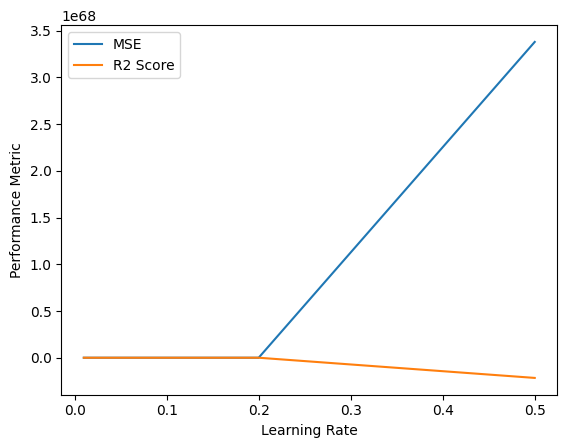

In [109]:
# Exercise 2 - GD Linear Regression with tuneable learning rate / MOMENTUM???
import numpy as np
import matplotlib.pyplot as plt

# Create lists to store learning rates, MSE, and R2 scores
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
mse_scores = []
r2_scores = []

# Loop over each learning rate
for rate in learning_rates:
    # Create an instance of GradientDescentLinearRegression
    gd_lr = GradientDescentLinearRegression(learning_rate=rate, n_iterations=100)
    gd_lr.fit(X_train_scaled, y_train_scaled)  # Fit the model
    mse = gd_lr.mse(X_test_scaled, y_test_scaled)  # Calculate MSE
    r2 = gd_lr.r2(X_test_scaled, y_test_scaled)  # Calculate R2 score

    # Append scores to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)

# Print the results
for i in range(len(learning_rates)):
    print(f"Learning Rate: {learning_rates[i]} | MSE: {mse_scores[i]} | R2 Score: {r2_scores[i]}")

# Plotting the results
plt.plot(learning_rates, mse_scores, label='MSE')
plt.plot(learning_rates, r2_scores, label='R2 Score')
plt.xlabel('Learning Rate')
plt.ylabel('Performance Metric')
plt.legend()
plt.show()
